In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
df=pd.read_csv('obesitas.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity


In [5]:
df['NObeyesdad'].unique()

array(['Normal', 'Overweight', 'Obesity', 'Insufficient'], dtype=object)

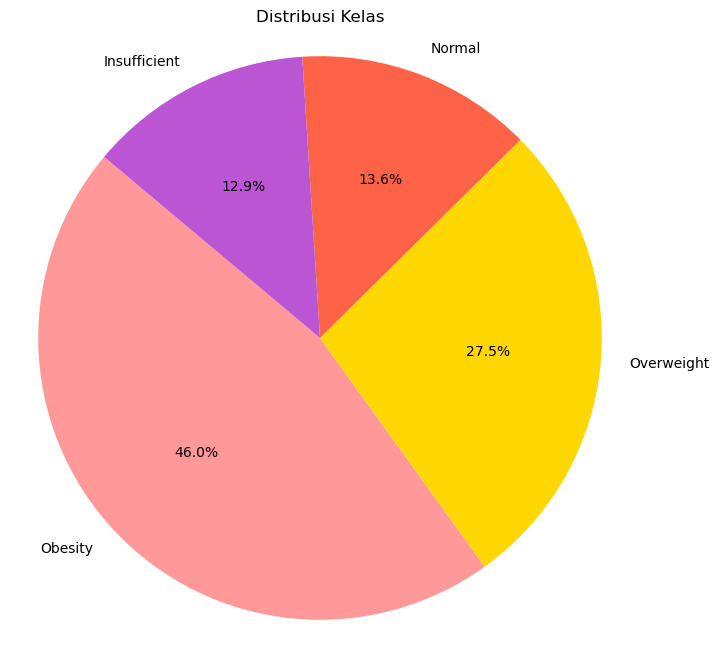

In [6]:
class_counts = df['NObeyesdad'].value_counts()

# Custom colors
custom_colors = ['#FF9999', '#FFD700', '#FF6347', '#BA55D3']

# Plot
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Distribusi Kelas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [7]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df.duplicated().sum()

24

In [11]:
df.drop_duplicates(inplace=True)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity


In [13]:
X=df.drop(['NObeyesdad'],axis=1)
Y=df['NObeyesdad']
X.shape, Y.shape

((2087, 16), (2087,))

In [14]:
numerics = LabelEncoder()
X['Gender'] = numerics.fit_transform(X['Gender'])
X['family_history_with_overweight'] = numerics.fit_transform(X['family_history_with_overweight'])
X['FAVC'] = numerics.fit_transform(X['FAVC'])
X['CAEC'] = numerics.fit_transform(X['CAEC'])
X['SMOKE'] = numerics.fit_transform(X['SMOKE'])
X['SCC'] = numerics.fit_transform(X['SCC'])
X['CALC'] = numerics.fit_transform(X['CALC'])
X['MTRANS'] = numerics.fit_transform(X['MTRANS'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

In [16]:
metrics = []

for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    metrics.append(accuracy)

best_k = metrics.index(max(metrics))+1
best_k

1

In [17]:
k_values = list(range(1,11))

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    model = model.score(X_test, y_test)
    print(f"Accuracy for k={k}: {model}")

Accuracy for k=1: 0.9101796407185628
Accuracy for k=2: 0.895808383233533
Accuracy for k=3: 0.8850299401197604
Accuracy for k=4: 0.8850299401197604
Accuracy for k=5: 0.8706586826347306
Accuracy for k=6: 0.8706586826347306
Accuracy for k=7: 0.8658682634730539
Accuracy for k=8: 0.8646706586826347
Accuracy for k=9: 0.8658682634730539
Accuracy for k=10: 0.8455089820359282


In [18]:
modelknn = KNeighborsClassifier(n_neighbors=1)
modelknn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.8455089820359282

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

Insufficient       0.78      0.97      0.87       114
      Normal       0.81      0.38      0.52       121
     Obesity       0.92      0.97      0.95       396
  Overweight       0.75      0.80      0.78       204

    accuracy                           0.85       835
   macro avg       0.82      0.78      0.78       835
weighted avg       0.84      0.85      0.83       835



In [43]:
df_pred = pd.DataFrame({'Y_True':y_test, 'Y_Pred':y_pred})
df_pred.head(50)

,Y_True,Y_Pred
285,Obesity,Obesity
1424,Obesity,Obesity
607,Insufficient,Insufficient
1880,Obesity,Obesity
787,Overweight,Overweight
1251,Obesity,Obesity
1328,Obesity,Obesity
1156,Overweight,Overweight
1475,Obesity,Obesity
612,Insufficient,Insufficient
